# Libraries, data entry and processing
The `class` column contains the target labels (e.g., "UP" and "DOWN").
These are encoded into numeric values: "UP" -> 1, "DOWN" -> 0.


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("electricity.csv")

# Encode the target variable
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])  # UP -> 1, DOWN -> 0

# Encode categorical data (e.g., the day column)
data['day'] = le.fit_transform(data['day'])

# Separate features (X) and target (y)
X = data[['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']].values
y = data['class'].values

# Ensure all feature data is numeric
X = X.astype('float32')


In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dense Model

Epoch 1/20


c:\Users\binif\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1020/1020 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6024 - loss: 0.6626 - val_accuracy: 0.6850 - val_loss: 0.5847
Epoch 2/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - accuracy: 0.7058 - loss: 0.5601 - val_accuracy: 0.7404 - val_loss: 0.5342
Epoch 3/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 0.7370 - loss: 0.5262 - val_accuracy: 0.7423 - val_loss: 0.5158
Epoch 4/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.7593 - loss: 0.5026 - val_accuracy: 0.7614 - val_loss: 0.4988
Epoch 5/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.7684 - loss: 0.4905 - val_accuracy: 0.7652 - val_loss: 0.4932
Epoch 6/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 0.7688 - loss: 0.4873 - val_accuracy: 0.7721 - val_loss: 0.4887
Epoch 7/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.7712 - loss: 0.4892 - val_accuracy: 0.7677 - val_loss: 0.4886
Epoch 8/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - accuracy: 0.7742 - loss: 0.4855

C:\Users\binif\AppData\Local\Temp\ipykernel_14332\3525651061.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Score', y='Metric', data=df_metrics, palette='viridis')


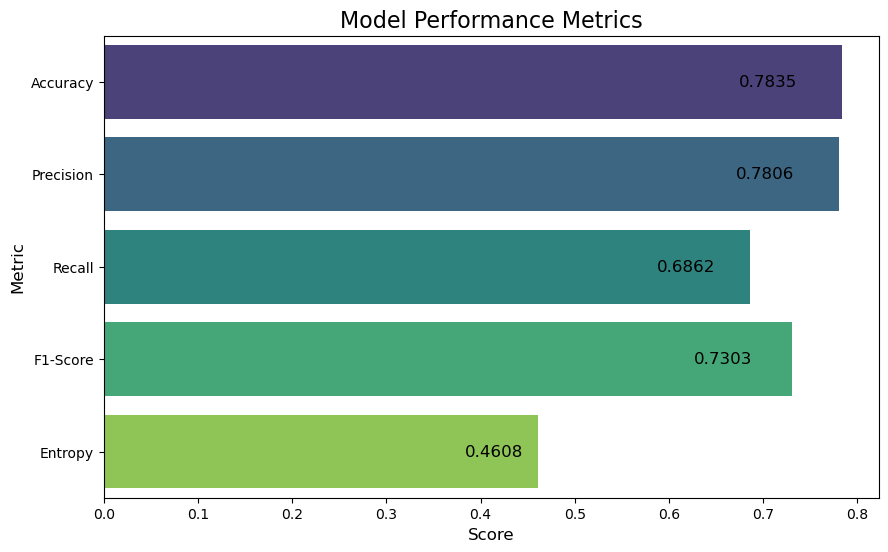

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, log_loss
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

# Create the model
model = Sequential([
    Dense(16, activation='relu', input_dim=X.shape[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate performance
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # Binary classification with 0.5 threshold

# Metrics
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
entropy = log_loss(y_test, y_pred)

# Present results in a table
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Entropy': entropy
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=[0])

# Performance Report
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")
print("\nModel Performance Metrics:")
print(metrics_df)

# Data for performance metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Entropy'],
    'Score': [accuracy, precision, recall, f1, entropy]
}

# Create a DataFrame
df_metrics = pd.DataFrame(metrics)

# Plot the metrics
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Score', y='Metric', data=df_metrics, palette='viridis')

# Title and labels
plt.title('Model Performance Metrics', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Metric', fontsize=12)

# Add metric values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.4f}',
                (p.get_x() + p.get_width() * 0.9, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black')

# Show the plot
plt.show()

# LTSM Model

Epoch 1/20


c:\Users\binif\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6004 - loss: 0.6584 - val_accuracy: 0.6797 - val_loss: 0.5895
Epoch 2/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7051 - loss: 0.5721 - val_accuracy: 0.7324 - val_loss: 0.5358
Epoch 3/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7494 - loss: 0.5256 - val_accuracy: 0.7492 - val_loss: 0.5117
Epoch 4/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7593 - loss: 0.5018 - val_accuracy: 0.7622 - val_loss: 0.5016
Epoch 5/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7665 - loss: 0.4936 - val_accuracy: 0.7652 - val_loss: 0.4963
Epoch 6/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7741 - loss: 0.4855 - val_accuracy: 0.7652 - val_loss: 0.4913
Epoch 7/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7725 - loss: 0.4824 - val_accuracy: 0.7716 - val_loss: 0.4891
Epoch 8/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7716 - loss: 0.4828 - val_accurac

C:\Users\binif\AppData\Local\Temp\ipykernel_14332\3353510050.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Score', y='Metric', data=metrics_df, palette='viridis')


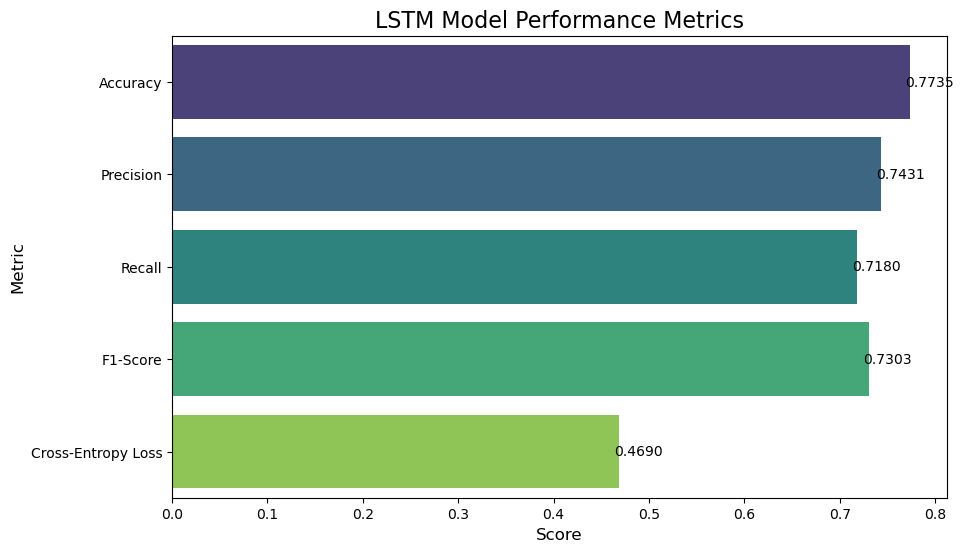

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv("electricity.csv")

# Preprocessing
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])  # Encode the target variable (UP -> 1, DOWN -> 0)

# Encode the categorical 'day' column
data['day'] = le.fit_transform(data['day'])

# Feature scaling
scaler = MinMaxScaler()
numerical_cols = ['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])  # Normalize numerical features to [0, 1]

# Prepare data for LSTM
X = data[numerical_cols].values
y = data['class'].values
X = X.reshape(X.shape[0], 1, X.shape[1])  # Reshape for LSTM input (samples, timesteps, features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid activation for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes

# Calculate additional metrics
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
entropy = log_loss(y_test, y_pred)

# Present metrics
print(f"Test Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Cross-Entropy Loss: {entropy}")

# Create a DataFrame for the metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Cross-Entropy Loss'],
    'Score': [accuracy, precision, recall, f1, entropy]
}
metrics_df = pd.DataFrame(metrics)

# Plot the metrics
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Score', y='Metric', data=metrics_df, palette='viridis')

# Add metric values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.4f}',
                (p.get_width() + 0.02, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black')

# Customize the plot
plt.title('LSTM Model Performance Metrics', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Metric', fontsize=12)
plt.show()


In [8]:
import shap

# Define a wrapper function for the model's prediction
def predict_fn(X):
    return model.predict(X)

# Reshape X_train to match the expected input format (2D)
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[2])

# Initialize SHAP KernelExplainer
explainer = shap.KernelExplainer(predict_fn, X_train_flat)

# Calculate SHAP values for the test set
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[2])
shap_values = explainer.shap_values(X_test_flat)

# Define feature names
feature_names = ['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']

# Visualize SHAP values (summary plot)
shap.summary_plot(shap_values[0], X_test_flat, feature_names=feature_names)

# Visualize SHAP values (bar plot for feature importance)
shap.summary_plot(shap_values[0], X_test_flat, feature_names=feature_names, plot_type='bar')


ModuleNotFoundError: No module named 'shap'